# AIML231 Assignment 2

> Shemaiah Rangitaawa `300601546`

# Part Two | Understanding the Data

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import r_regression

np.set_printoptions(precision=3)

## Load Data

In [2]:
# Load full data and split the dataset into feature matrix X and label vector y
df = pd.read_csv('./Data.csv')
df.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att12,Att13,Att14,Att15,Att16,Att17,Att18,Att19,Att20,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


## Summary Statistics 

In [3]:
def stats(df):
    # Number of instances and features
    num_instances = df.shape[0]
    num_features = df.shape[1] - 1  # excluding the target variable Class
    print(f"Total number of instances: {num_instances}")
    print(f"Number of features (excluding Class): {num_features}")
    
    # Distinguishing between categorical and numerical features
    categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    print(f"Number of categorical features: {len(categorical_features)}")
    print(f"Number of numerical features: {len(numerical_features)}")

stats(df)

Total number of instances: 1000
Number of features (excluding Class): 20
Number of categorical features: 13
Number of numerical features: 8


## Pearson Correlation

In [4]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the Pearson correlation matrix for numerical data only
correlation_matrix = numerical_df.corr()
target_correlation = correlation_matrix['Class'].drop('Class')  # Exclude self-correlation

# Sort the correlations to find the top three with the highest absolute values
top_three_correlations = target_correlation.abs().sort_values(ascending=False).head(3)

# Print the results
print("Top three numerical features with the highest correlation with 'Credit Risk':")
top_three_correlations

Top three numerical features with the highest correlation with 'Credit Risk':


Att2     0.214927
Att5     0.154739
Att13    0.091127
Name: Class, dtype: float64

## Histograms of the Top Three Highest Correlating Features and Target Variable

c:\Users\xdxei\anaconda3\envs\AIML231\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\xdxei\anaconda3\envs\AIML231\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\xdxei\anaconda3\envs\AIML231\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Att2 - Skewness: 1.09, Kurtosis: 0.91
Att5 - Skewness: 1.95, Kurtosis: 4.27
Att13 - Skewness: 1.02, Kurtosis: 0.59


c:\Users\xdxei\anaconda3\envs\AIML231\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Class - Skewness: 0.87, Kurtosis: -1.24


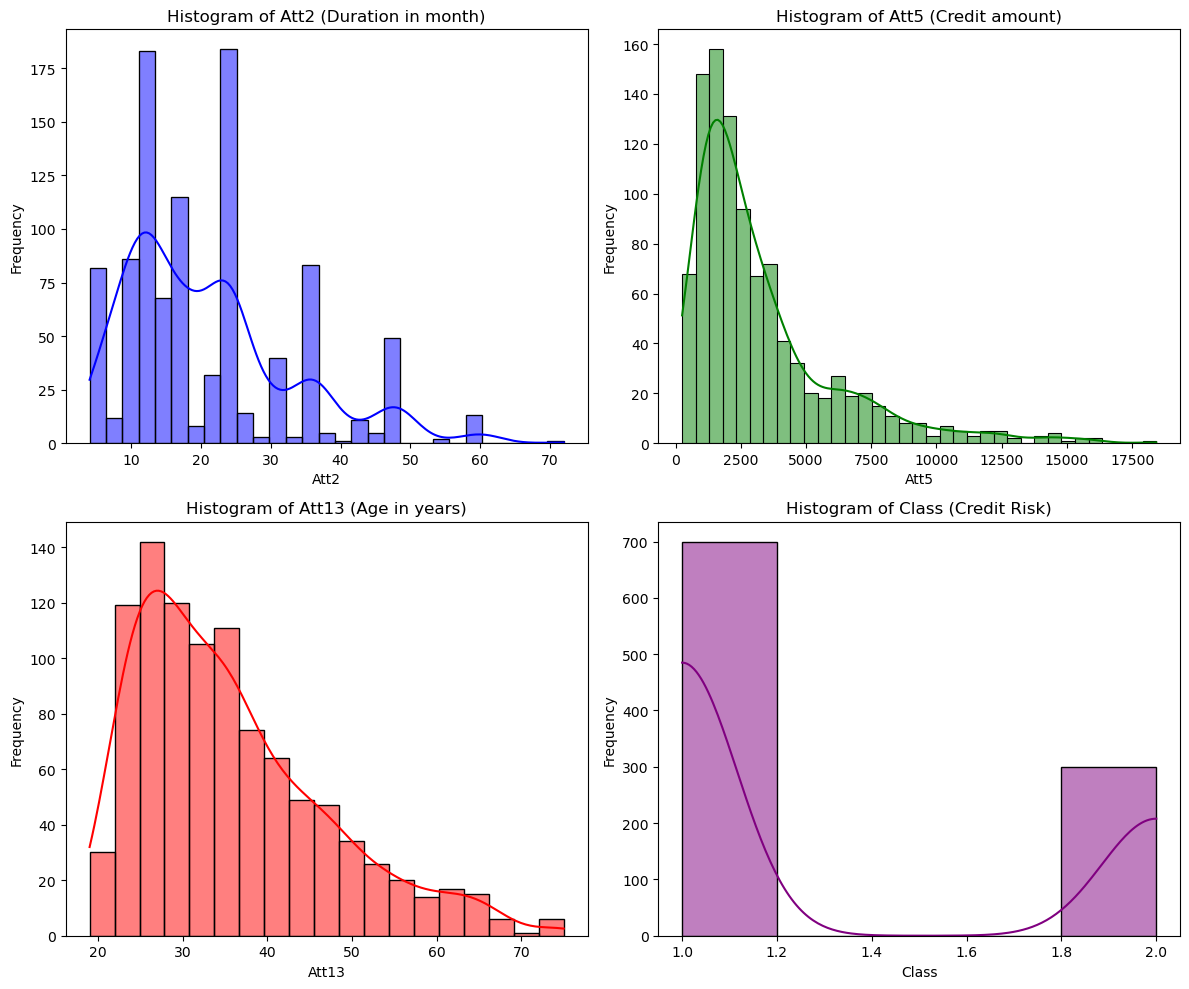

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Features with descriptions
features = ['Att2 (Duration in month)', 'Att5 (Credit amount)', 'Att13 (Age in years)', 'Class (Credit Risk)']

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the 2D array of axes

# Colors for each plot
colors = ['blue', 'green', 'red', 'purple']

for i, feature in enumerate(features):
    # Use Attribute number for X axis label
    short_label = feature.split(' ')[0]
    
    sns.histplot(df[short_label], kde=True, bins='fd', color=colors[i], ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(short_label)
    axes[i].set_ylabel('Frequency')
    
    # Calculate and display skewness and kurtosis
    feature_skewness = skew(df[short_label].dropna())  # Drop null values for calculation
    feature_kurtosis = kurtosis(df[short_label].dropna())
    print(f"{short_label} - Skewness: {feature_skewness:.2f}, Kurtosis: {feature_kurtosis:.2f}")

plt.tight_layout()
plt.show()

## Checking for Missing Values

> The Att1 feature has 65 null values

In [6]:
def find_null_values(df):
    missing_values = df.isnull().sum()
    total_cells = np.prod(df.shape)
    total_missing = missing_values.sum()
    
    print("Missing values in each feature:")
    print(missing_values[missing_values > 0])
    print(f"\nTotal missing values: {total_missing}")
    print(f"Percentage of dataset missing: {total_missing / total_cells * 100:.2f}%")

find_null_values(df)

Missing values in each feature:
Att1    65
dtype: int64

Total missing values: 65
Percentage of dataset missing: 0.31%


# Part Three | Data Preprocessing

## 80:20 Train and Test Set Split

In [7]:
from sklearn.model_selection import train_test_split

X, y = df.drop('Class', axis=1),  df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Pipeline Import and Preprocessing
The `preprocess` function prepares training and testing datasets applying several preprocessing steps to pandas DataFrame. It performs the following tasks:

1. **Converts categorical data to numeric**: It imputes missing values in ordinal columns, encodes ordinal and non-ordinal categorical attributes, and handles potential multicollinearity in one-hot encoding by dropping the first category.
2. **Handles missing values in numeric columns** by using median imputation.
3. **Standardizes numeric data** to have zero mean and unit variance.

The function outputs the transformed data as new pandas DataFrames.

In [8]:
from Pipeline import preprocess

# Process data
X_train_processed, X_test_processed = preprocess(X_train, X_test)

### Processed Data Infomation

> Mean imputation performed in preprocessing fills in the null entries.

In [9]:
find_null_values(X_train_processed)

Missing values in each feature:
Series([], dtype: int64)

Total missing values: 0
Percentage of dataset missing: 0.00%


> Preprocessing makes all features numeric, ordinal encoding adds 16 new features, 4 for each of the four ordinal attributes.

In [10]:
stats(X_train_processed)

Total number of instances: 800
Number of features (excluding Class): 36
Number of categorical features: 0
Number of numerical features: 37


> The preprocessing function was also designed to retain feature names for simple analysis in subsequent sections.

In [11]:
X_train_processed.head()

,Att2,Att5,Att8,Att11,Att13,Att16,Att18,Att4_A41,Att4_A410,Att4_A42,...,Att15_A153,Att17_A172,Att17_A173,Att17_A174,Att19_A192,Att20_A202,Att1,Att3,Att6,Att7
0,3.297082,1.199912,0.031196,1.044509,2.406187,1.017777,-0.409736,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,4.0
1,-0.008051,-0.359630,-0.860109,-1.671440,-0.224364,-0.710931,-0.409736,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,4.0,1.0,1.0
2,-1.279256,-0.733547,-0.860109,1.044509,1.266282,-0.710931,-0.409736,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0
3,-0.008051,0.567050,-1.751413,1.044509,-0.575104,1.017777,-0.409736,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
4,-0.770774,-0.854388,0.922500,-0.766124,-1.276585,-0.710931,-0.409736,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0


# Part Four | Feature Ranking

In [12]:
# Convert data frame to numpy array
X_train_nparr, X_test_nparr = X_train_processed.values, X_test_processed.values
y_train_nparr, y_test_nparr = y_train.values, y_test.values

In [13]:
from attributes import attribute_dict

def get_feature_description(code):
    """
    Retrieves a feature's description based on its code, which could include an attribute key and optionally a value key after an underscore.
    :params code (str): The feature code.
    :returns (str): Description/name of the feature, or "Unknown Attribute"/"Unknown Value" if keys are not recognized.
    """
    parts = code.split('_')
    att_key = parts[0]
    value_key = parts[1] if len(parts) > 1 else None
    
    if att_key in attribute_dict:
        if value_key and 'Values' in attribute_dict[att_key]:
            return f"{attribute_dict[att_key]['Description']} - {attribute_dict[att_key]['Values'].get(value_key, 'Unknown Value')}"
        return attribute_dict[att_key]['Description']
    return "Unknown Attribute"

### Top n Features After Ranking

In [14]:
from Pipeline import feature_ranking
from sklearn.neighbors import KNeighborsClassifier
import Helper

# Initialize the classifier
clf = KNeighborsClassifier(n_neighbors=3)

# Obtain the indices of the top n features from the ranking function
top_features_indices = feature_ranking(X_train_nparr, y_train_nparr, no_features=5)

# Get the feature names corresponding to the top indices
top_feature_codes = X_train_processed.columns[top_features_indices].tolist()

# Display the rank and feature name using a function to get the feature's description
print("Feature Ranking with MI:")
for index, feature_name in zip(top_features_indices, top_feature_codes):
    print(f"    {index} : {get_feature_description(feature_name)}")

# Evaluate the model using all features
all_features_accuracy = Helper.evaluation(clf, X_train_nparr, y_train_nparr, X_test_nparr, y_test_nparr)
print(f"\nAccuracy of using all features: {all_features_accuracy * 100:.2f}%")

# Evaluate the model using only the top five features
top_features_accuracy = Helper.evaluation(
    clf,
    X_train_nparr[:, top_features_indices],
    y_train_nparr,
    X_test_nparr[:, top_features_indices],
    y_test_nparr
)
print(f"Accuracy of using top five features: {top_features_accuracy * 100:.2f}%")

Feature Ranking with MI:
    35 : Savings account/bonds
    29 : Job - skilled employee / official
    33 : Status of existing checking account
    0 : Duration in month
    34 : Credit history

Accuracy of using all features: 61.12%
Accuracy of using top five features: 69.26%


## Pearson Correlation Heatmap for Features Ranked with MI

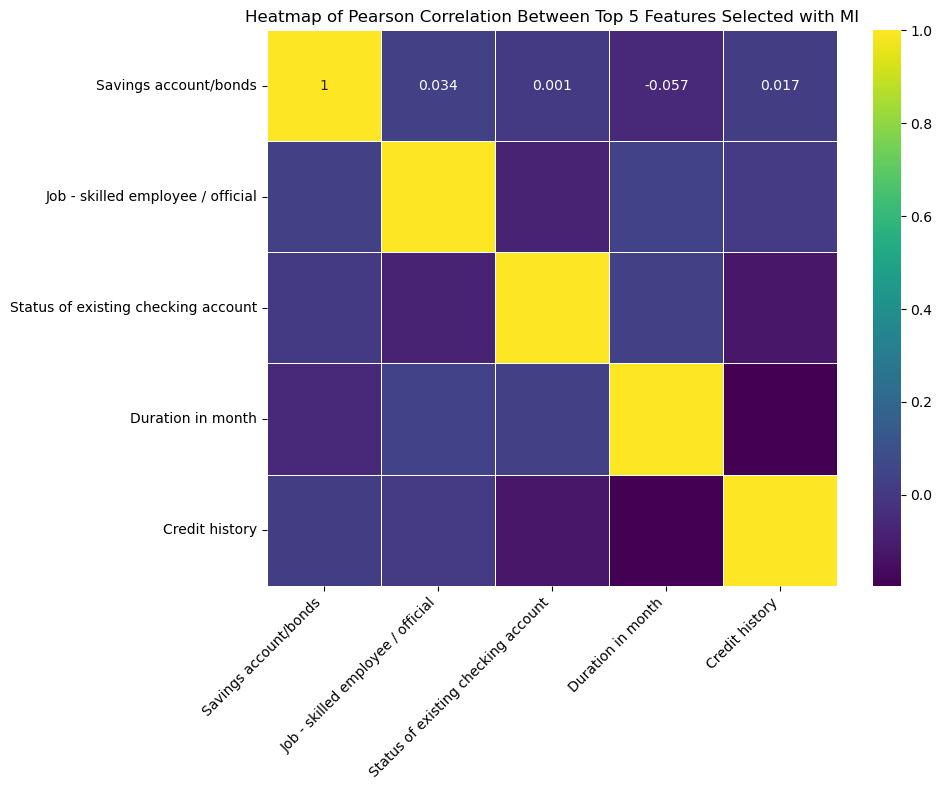

In [15]:
# Create a DataFrame with just the top features
top_features_descriptions_mi = [get_feature_description(name) for name in top_feature_codes]
X_top_features = pd.DataFrame(X_train_nparr[:, top_features_indices], columns=top_features_descriptions_mi)

# Compute the Pearson correlation matrix
correlation_matrix = X_top_features.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.title('Heatmap of Pearson Correlation Between Top 5 Features Selected with MI')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Part Five | Sequential Forward Feature Selection (SFFS)

In [16]:
from Pipeline import sequential_feature_selection

# Perform feature selection
sffs_top_features = sequential_feature_selection(X_train_nparr, y_train_nparr, no_features=5)
sffs_feature_codes = X_train_processed.columns[sffs_top_features].tolist()

# Print the index and feature name with descriptions
print("Feature Ranking with SFFS:")
for index, code in zip(sffs_top_features, sffs_feature_codes):
    print(f"     {index} : {get_feature_description(code)}")

# Print accuracy using all features
print(f"\nAccuracy of using all features: {all_features_accuracy * 100:.2f}%")

# Evaluate the model using the top five features selected by SFFS
top_features_accuracy = Helper.evaluation(
    clf,
    X_train_nparr[:, sffs_top_features],
    y_train_nparr,
    X_test_nparr[:, sffs_top_features],
    y_test_nparr
)
print(f"Accuracy of using top five features: {top_features_accuracy * 100:.2f}%")

Feature Ranking with SFFS:
     13 : Purpose - education
     34 : Credit history
     15 : Purpose - business
     28 : Job - unskilled - resident
     24 : Other installment plans - stores

Accuracy of using all features: 61.12%
Accuracy of using top five features: 52.96%


## Pearson Correlation Heatmap for Features Ranked with SFFS

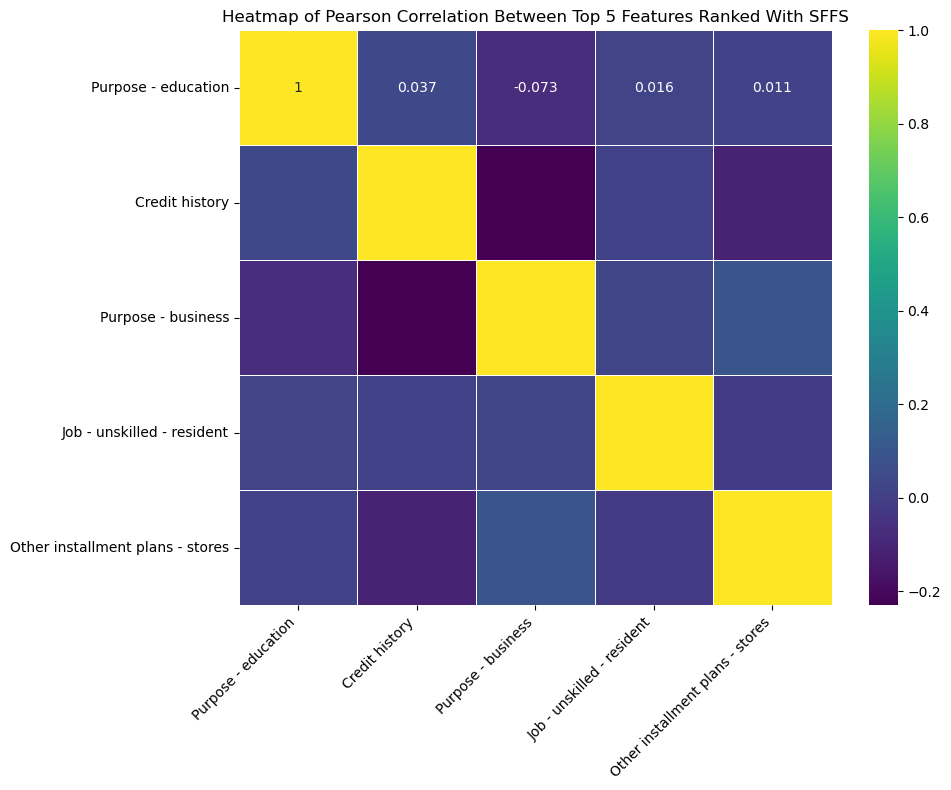

In [17]:
# Create a DataFrame with just the top features
top_features_descriptions_sffs = [get_feature_description(name) for name in sffs_feature_codes]
X_top_features = pd.DataFrame(X_train_nparr[:, sffs_top_features], columns=top_features_descriptions_sffs)

# Compute the Pearson correlation matrix
correlation_matrix = X_top_features.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.title('Heatmap of Pearson Correlation Between Top 5 Features Ranked With SFFS')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()